### Case Study I : Deep Learning Hello World
- Pytorch based Perceptron vs Multi-Layer Perceptron
Using the dummy dataset shared below, implement the following models :
1. Perceptron
2. Multi-Layer Perceptron with 1 hidden layer
3. A Flexible MLP class that takes parameters to generate an MLP of desired size :
    a. input_dim (int): dimension of input 
    b. hidden_dim([int]): array with each element denoting the size of hidden layer
For each model generate :
1. Evaluation results, i.e the confusion matrix (with precision and recall)
2. Plot the learning curve(loss value). 
3. Bonus (optional): implement a function that can visualize the decision boundary

```code snippet
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
import seaborn as sns

# 1. Create a linearly separable dataset
n_samples = 1000
X_linear, y_linear = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

# 2. Create a non-linearly separable dataset
X_nonlinear, y_nonlinear = make_circles(n_samples=n_samples, noise=0.1, factor=0.5, random_state=42)

# Function to visualize datasets
def plot_dataset(X, y, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='Class 1')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize both datasets
plot_dataset(X_linear, y_linear, 'Moon Dataset (Semi-linearly Separable)')
plot_dataset(X_nonlinear, y_nonlinear, 'Circle Dataset (Non-linearly Separable)')

X = X_nonlinear
y = y_nonlinear
```


In [3]:
import numpy as np 
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [4]:
n_sample = 1000
X,y = make_circles(n_samples=n_sample, noise=0.1, factor=0.5, random_state=42)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def train_model(model,criterion, optimizer, X_train,y_train, epochs=100):
    losses = [] 

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs,y_train)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

In [6]:
# Evaluation (confusion matrix, metrics)
def evaluate_model(model,X_test, y_test):
    with torch.no_grad():
        output = model(X_test)
        preds = torch.argmax(output,dim=1)
    
    cm = confusion_matrix(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    return cm, precision, recall, accuracy

In [7]:
def plot_learning_curve(losses,title):
    plt.figure(figsize=(6,4))
    plt.plot(losses)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

In [9]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


### 1. Perceptron!

In [8]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 2)
    
    def forward(self, x):
        return self.linear(x)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

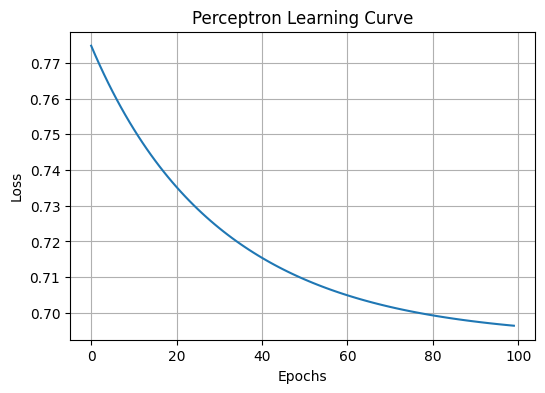

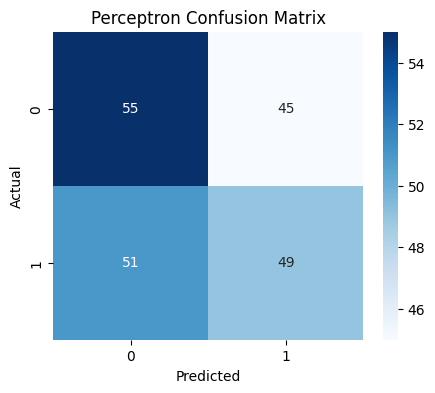

perceptron precision: 0.5213, recall: 0.4900, accuracy: 0.5200


In [12]:
model_p = Perceptron(input_dim=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_p.parameters(), lr=0.1)

losses_p = train_model(model_p, criterion, optimizer, X_train, y_train, epochs=100)
cm_p, precision_p, recall_p, accuracy_p = evaluate_model(model_p, X_test, y_test)

plot_learning_curve(losses_p, "Perceptron Learning Curve")
plot_confusion_matrix(cm_p, "Perceptron Confusion Matrix")

print(f"perceptron precision: {precision_p:.4f}, recall: {recall_p:.4f}, accuracy: {accuracy_p:.4f}")

### 2. Multi-Layer Perceptron with 1 hidden layer

In [13]:
class MLPHidden(nn.Module):
    def __init__(self,input_dim,hidden_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 2)
        )
    def forward(self,x):
        return self.net(x)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

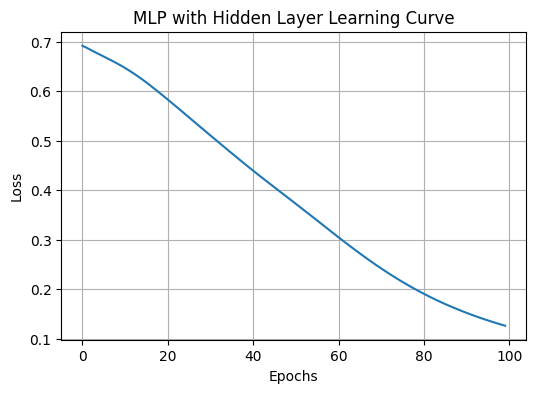

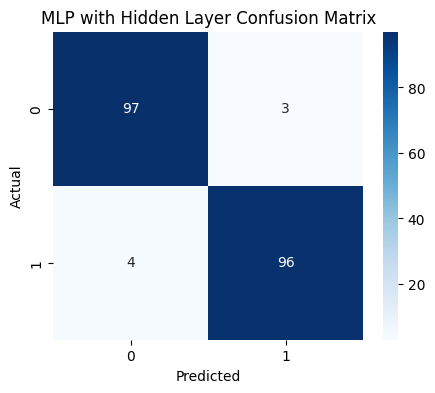

MLP precision: 0.9697, recall: 0.9600, accuracy: 0.9650


In [14]:
model_mlp1 = MLPHidden(input_dim=2, hidden_dim=16)
optimizer_mlp = optim.Adam(model_mlp1.parameters(), lr=0.01)

losses_mlp1 = train_model(model_mlp1, criterion, optimizer_mlp, X_train, y_train, epochs=100)
cm_mlp1, precision_mlp1, recall_mlp1, accuracy_mlp1 = evaluate_model(model_mlp1, X_test, y_test)

plot_learning_curve(losses_mlp1, "MLP with Hidden Layer Learning Curve")
plot_confusion_matrix(cm_mlp1, "MLP with Hidden Layer Confusion Matrix")

print(f"MLP precision: {precision_mlp1:.4f}, recall: {recall_mlp1:.4f}, accuracy: {accuracy_mlp1:.4f}")